In [179]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [180]:
pd.set_option('display.max_rows', 50)

In [143]:
df = pd.read_csv('../data/DATI.CSV')

In [229]:
raw = df
raw

,Time_ms,AccelX,AccelY,AccelZ,Temp_C,Pressure_hPa,Is_Header,Batch,RawAltitude,AdjustedAltitude,Gap,Time_cumulative,Time_cumulative_sec,Time_cumulative_min
0,4.0,-4.43,-0.63,-10.16,18.49,1026.83,False,1,-113.794980,2.687726,100.0,0.0,0.000,0.000000
1,104.0,-4.28,0.16,-10.16,18.63,1026.91,False,1,-114.516674,1.966031,100.0,200.0,0.200,0.003333
2,204.0,-4.20,0.12,-10.12,18.64,1026.91,False,1,-114.520599,1.962106,100.0,300.0,0.300,0.005000
3,321.0,-3.96,-0.39,-10.04,18.67,1026.90,False,1,-114.448981,2.033725,117.0,434.0,0.434,0.007233
4,441.0,-4.20,0.51,-9.49,18.71,1026.90,False,1,-114.464668,2.018037,120.0,557.0,0.557,0.009283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,789.0,1.65,-5.14,-9.53,20.18,1026.23,False,16,-109.423463,7.059242,118.0,1751170.0,1751.170,29.186167
14160,907.0,2.35,-4.63,-7.73,20.20,1026.22,False,16,-109.347049,7.135656,118.0,1751288.0,1751.288,29.188133
14161,1023.0,6.71,-1.06,-9.38,20.21,1026.22,False,16,-109.350777,7.131929,116.0,1751402.0,1751.402,29.190033
14162,1142.0,2.20,-4.55,-10.55,20.22,1026.22,False,16,-109.354504,7.128201,119.0,1751524.0,1751.524,29.192067


### clean and add

In [145]:
# Identify header rows
df['Is_Header'] = df["Time (ms)"].astype(str).str.contains("Time")
# Create a batch counter (increment on header rows)
df['Batch'] = df['Is_Header'].cumsum() + 1
# Replace header rows' Batch value with "Header" for clarity
df.loc[df['Is_Header'], 'Batch'] = "Header"

/var/folders/5s/yrsc12f55hlchq16dd1vyhfh0000gn/T/ipykernel_72508/2609384962.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Header' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Is_Header'], 'Batch'] = "Header"


In [146]:
# Define a dictionary to rename columns
column_rename_dict = {
    "Time (ms)": "Time_ms",
    "Accel_X (m/s^2)": "AccelX",
    "Accel_Y (m/s^2)": "AccelY",
    "Accel_Z (m/s^2)": "AccelZ",
    "Temp (\u00b0C)": "Temp_C",
    "Pressure (hPa)": "Pressure_hPa"
}


# Rename columns using the dictionary
df.rename(columns=column_rename_dict, inplace=True)

columns_to_convert = list(column_rename_dict.values())
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [147]:
df

,Time_ms,AccelX,AccelY,AccelZ,Temp_C,Pressure_hPa,Is_Header,Batch
0,4.0,-4.43,-0.63,-10.16,18.49,1026.83,False,1
1,104.0,-4.28,0.16,-10.16,18.63,1026.91,False,1
2,204.0,-4.20,0.12,-10.12,18.64,1026.91,False,1
3,321.0,-3.96,-0.39,-10.04,18.67,1026.90,False,1
4,441.0,-4.20,0.51,-9.49,18.71,1026.90,False,1
...,...,...,...,...,...,...,...,...
14159,789.0,1.65,-5.14,-9.53,20.18,1026.23,False,16
14160,907.0,2.35,-4.63,-7.73,20.20,1026.22,False,16
14161,1023.0,6.71,-1.06,-9.38,20.21,1026.22,False,16
14162,1142.0,2.20,-4.55,-10.55,20.22,1026.22,False,16


In [148]:
df[df.Is_Header==True]

,Time_ms,AccelX,AccelY,AccelZ,Temp_C,Pressure_hPa,Is_Header,Batch
231,NaN,NaN,NaN,NaN,NaN,NaN,True,Header
425,NaN,NaN,NaN,NaN,NaN,NaN,True,Header
432,NaN,NaN,NaN,NaN,NaN,NaN,True,Header
444,NaN,NaN,NaN,NaN,NaN,NaN,True,Header
445,NaN,NaN,NaN,NaN,NaN,NaN,True,Header
446,NaN,NaN,NaN,NaN,NaN,NaN,True,Header
448,NaN,NaN,NaN,NaN,NaN,NaN,True,Header
692,NaN,NaN,NaN,NaN,NaN,NaN,True,Header
2078,NaN,NaN,NaN,NaN,NaN,NaN,True,Header
2114,NaN,NaN,NaN,NaN,NaN,NaN,True,Header


In [149]:
def calculate_altitude(pressure, temperature= 20):
    # Constants
    P0 = 1013.25  # Reference pressure at sea level in hPa
    L = 0.0065    # Temperature lapse rate in K/m
    T0 = temperature + 273.15  # Convert temperature to Kelvin
    R = 287.05    # Specific gas constant for dry air in J/(kg·K)
    g = 9.80665   # Gravitational acceleration in m/s²

    # Calculate altitude (h) using the barometric formula
    altitude = (T0 / L) * (1 - (pressure / P0) ** (R * L / g))
    return altitude

In [150]:
df['RawAltitude'] = df.apply(lambda x: calculate_altitude(x.Pressure_hPa, x.Temp_C), axis=1)
df['AdjustedAltitude'] = df['RawAltitude']-df['RawAltitude'].min()
print ('max altitude =', df['AdjustedAltitude'].max())

max altitude = 138.70461985963306


In [151]:
df

,Time_ms,AccelX,AccelY,AccelZ,Temp_C,Pressure_hPa,Is_Header,Batch,RawAltitude,AdjustedAltitude
0,4.0,-4.43,-0.63,-10.16,18.49,1026.83,False,1,-113.794980,2.687726
1,104.0,-4.28,0.16,-10.16,18.63,1026.91,False,1,-114.516674,1.966031
2,204.0,-4.20,0.12,-10.12,18.64,1026.91,False,1,-114.520599,1.962106
3,321.0,-3.96,-0.39,-10.04,18.67,1026.90,False,1,-114.448981,2.033725
4,441.0,-4.20,0.51,-9.49,18.71,1026.90,False,1,-114.464668,2.018037
...,...,...,...,...,...,...,...,...,...,...
14159,789.0,1.65,-5.14,-9.53,20.18,1026.23,False,16,-109.423463,7.059242
14160,907.0,2.35,-4.63,-7.73,20.20,1026.22,False,16,-109.347049,7.135656
14161,1023.0,6.71,-1.06,-9.38,20.21,1026.22,False,16,-109.350777,7.131929
14162,1142.0,2.20,-4.55,-10.55,20.22,1026.22,False,16,-109.354504,7.128201


In [152]:
time = df.Time_ms

####
newheader_gap = 1000
standard_gap = 100
####


gaps = [standard_gap]
tot_time = 0
cumulative = [0]

for i,t in enumerate(time):
    if i < len(time)-1:
        if np.isnan(t):
            gaps.append(newheader_gap)
            tot_time = tot_time + newheader_gap
            cumulative.append(tot_time+gap)
        else:
            if not np.isnan(time[i+1]): # if next is nan
                gap = time[i+1] - time[i]
            else:
                gap = standard_gap
            gaps.append(gap)
            tot_time = tot_time + gap
            cumulative.append(tot_time+gap)

tot_sec = tot_time/1000

df['Gap'] = gaps
df['Time_cumulative'] = cumulative
df['Time_cumulative_sec'] = df.Time_cumulative/1000
df['Time_cumulative_min'] = df.Time_cumulative_sec/60

tot_sec = df.Time_cumulative.max()/1000
print ('tot sec = ', tot_sec)

tot sec =  1751.645


### Edited df

In [153]:
df

,Time_ms,AccelX,AccelY,AccelZ,Temp_C,Pressure_hPa,Is_Header,Batch,RawAltitude,AdjustedAltitude,Gap,Time_cumulative,Time_cumulative_sec,Time_cumulative_min
0,4.0,-4.43,-0.63,-10.16,18.49,1026.83,False,1,-113.794980,2.687726,100.0,0.0,0.000,0.000000
1,104.0,-4.28,0.16,-10.16,18.63,1026.91,False,1,-114.516674,1.966031,100.0,200.0,0.200,0.003333
2,204.0,-4.20,0.12,-10.12,18.64,1026.91,False,1,-114.520599,1.962106,100.0,300.0,0.300,0.005000
3,321.0,-3.96,-0.39,-10.04,18.67,1026.90,False,1,-114.448981,2.033725,117.0,434.0,0.434,0.007233
4,441.0,-4.20,0.51,-9.49,18.71,1026.90,False,1,-114.464668,2.018037,120.0,557.0,0.557,0.009283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,789.0,1.65,-5.14,-9.53,20.18,1026.23,False,16,-109.423463,7.059242,118.0,1751170.0,1751.170,29.186167
14160,907.0,2.35,-4.63,-7.73,20.20,1026.22,False,16,-109.347049,7.135656,118.0,1751288.0,1751.288,29.188133
14161,1023.0,6.71,-1.06,-9.38,20.21,1026.22,False,16,-109.350777,7.131929,116.0,1751402.0,1751.402,29.190033
14162,1142.0,2.20,-4.55,-10.55,20.22,1026.22,False,16,-109.354504,7.128201,119.0,1751524.0,1751.524,29.192067


In [154]:
df.to_csv('../data/00_data.csv')

# Indexplot

In [155]:
columns_to_plot = ['Time_ms', 'AccelX', 'AccelY', 'AccelZ', 'Temp_C', 'Pressure_hPa', 'AdjustedAltitude']

In [156]:
missing_index = df.index[df['Is_Header'] == True].tolist()

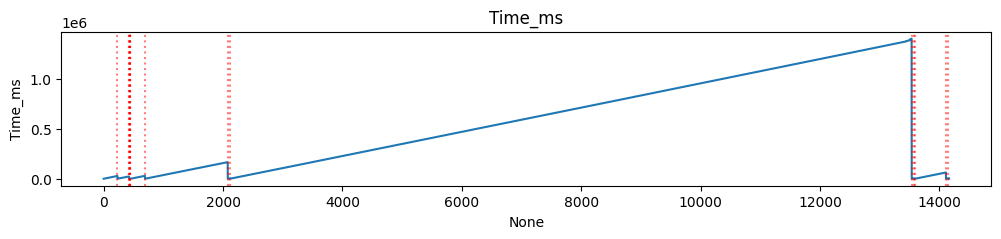

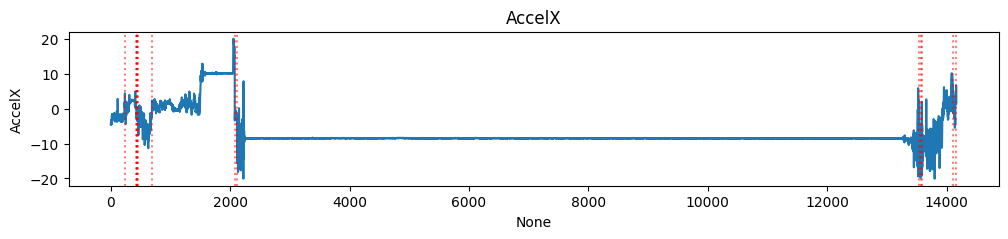

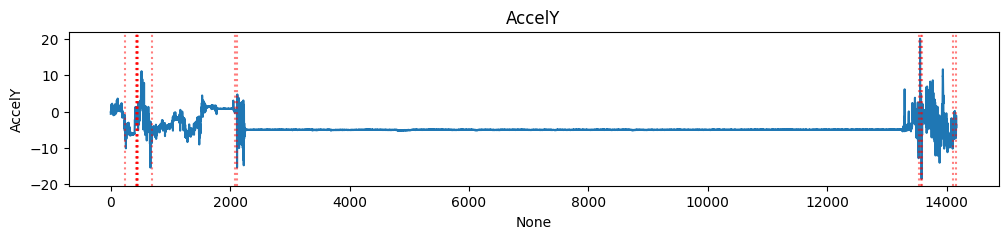

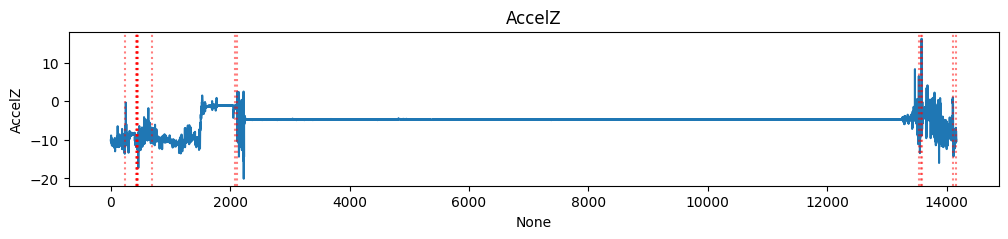

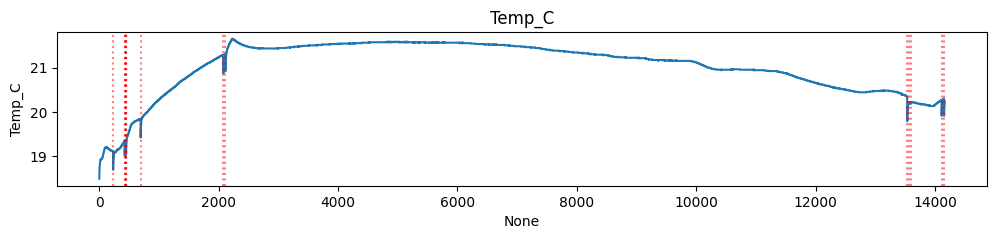

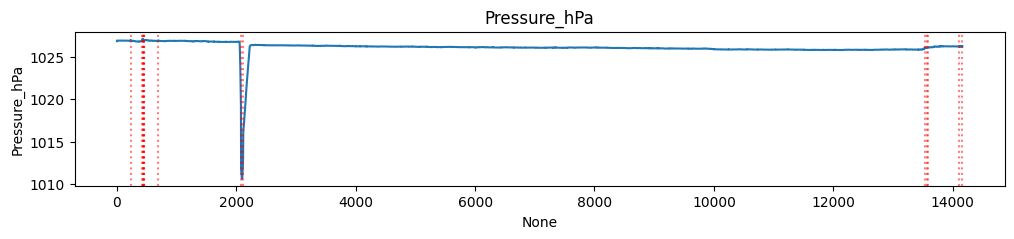

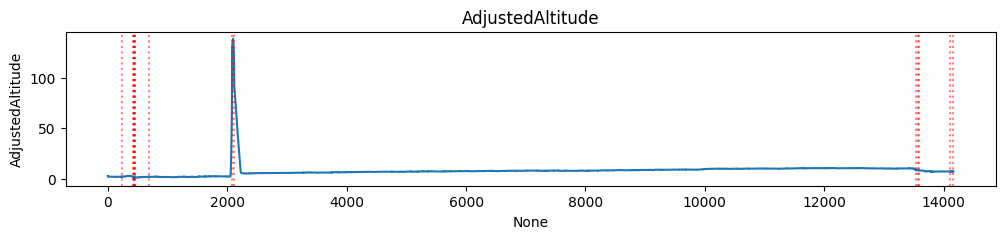

In [157]:
for c in columns_to_plot:
    plt.figure(figsize=(12,2))
    plt.title(c)
    sns.lineplot(data=df, x= df.index , y = df[c])
    for i in missing_index:
        plt.axvline(x=i, color='red', linestyle='dotted', alpha = 0.5)
    plt.show()

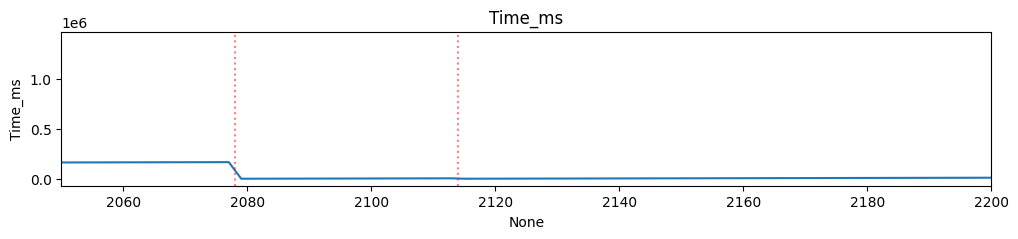

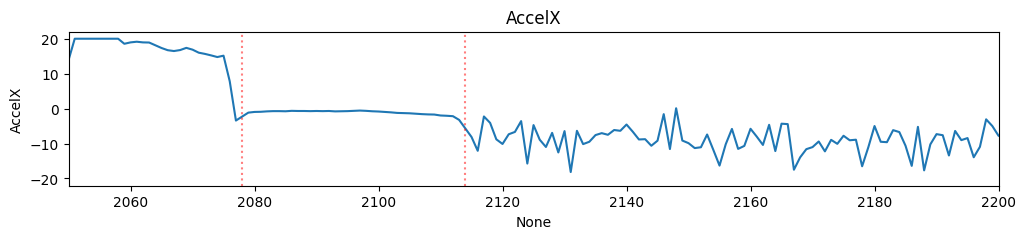

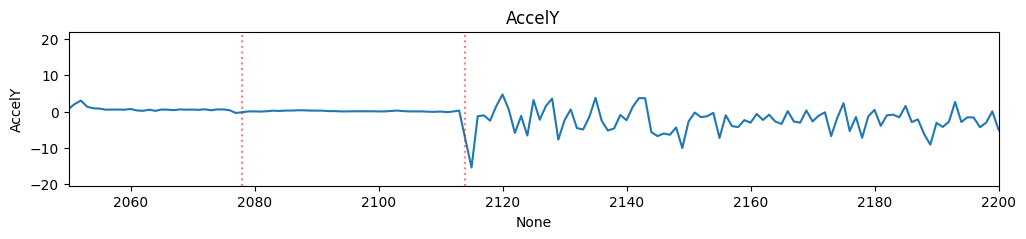

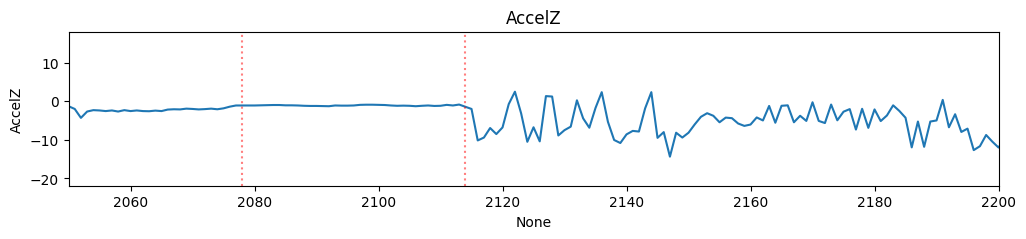

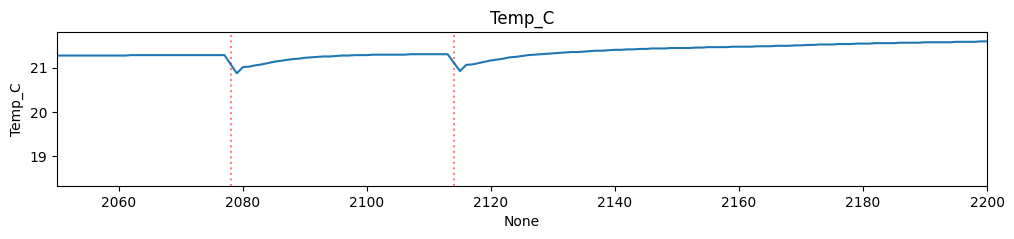

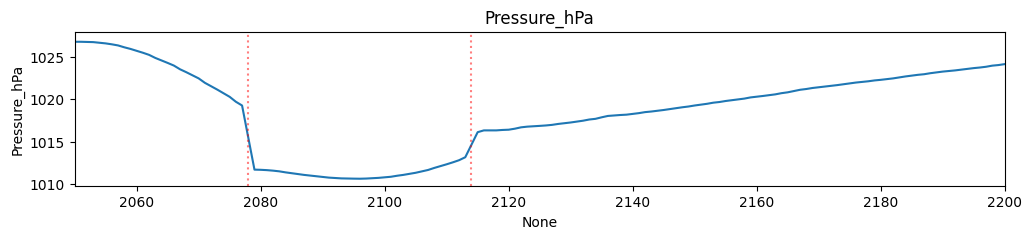

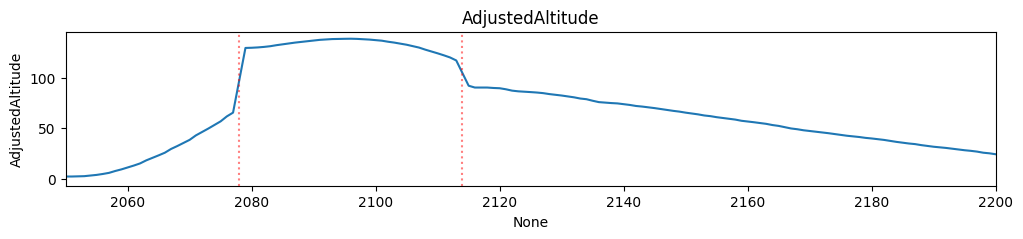

In [158]:
for c in columns_to_plot:
    plt.figure(figsize=(12,2))
    plt.title(c)
    sns.lineplot(data=df, x= df.index , y = df[c])
    for i in missing_index:
        plt.axvline(x=i, color='red', linestyle='dotted', alpha = 0.5)
    plt.xlim([2050,2200])
    plt.show()

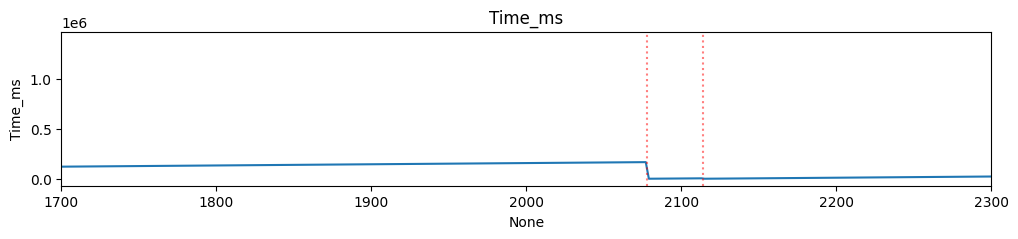

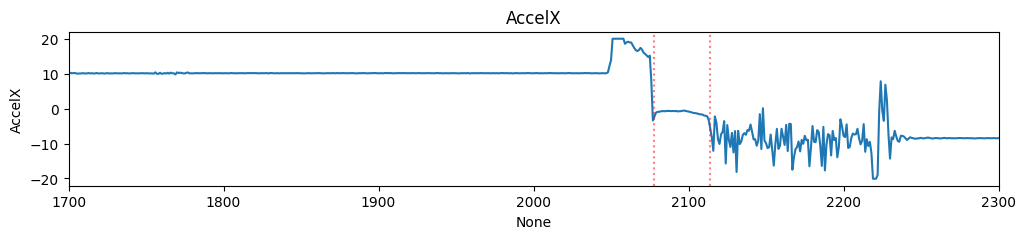

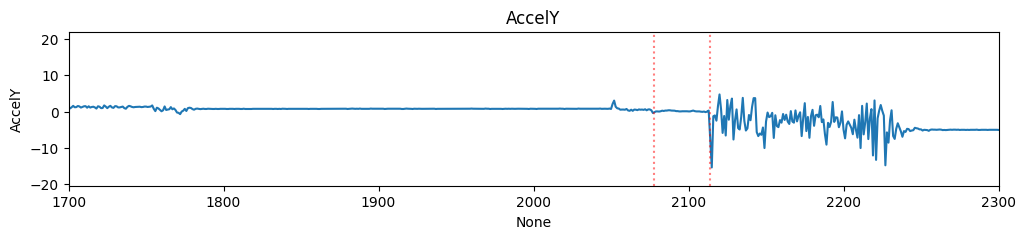

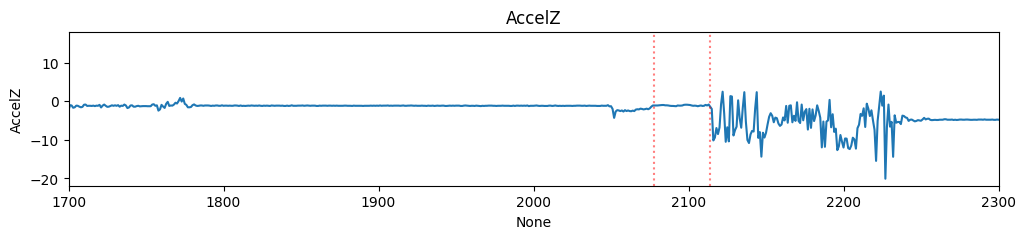

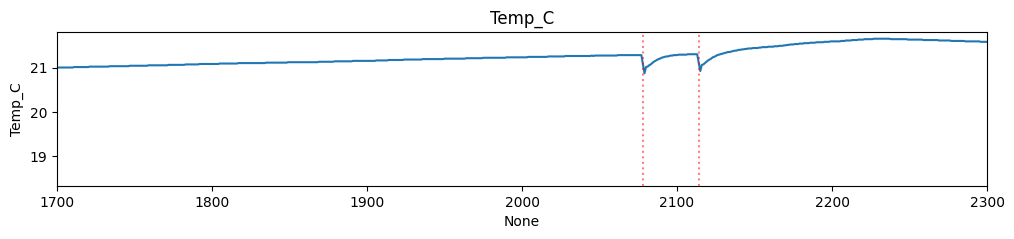

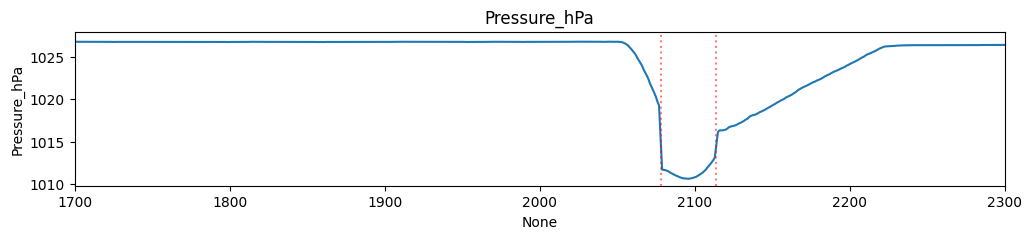

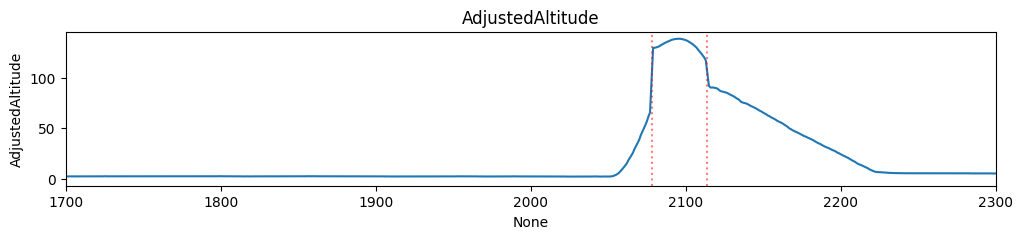

In [159]:
for c in columns_to_plot:
    plt.figure(figsize=(12,2))
    plt.title(c)
    sns.lineplot(data=df, x= df.index , y = df[c])
    for i in missing_index:
        plt.axvline(x=i, color='red', linestyle='dotted', alpha = 0.5)
    plt.xlim([1700,2300])
    plt.show()

# Delays

(50.0, 150.0)

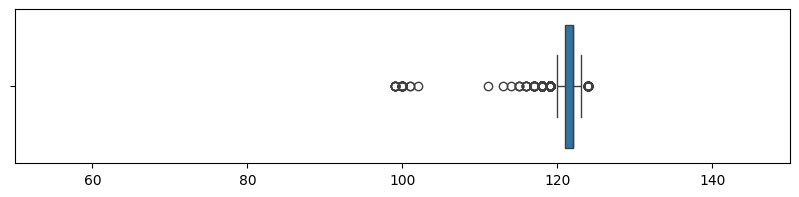

In [160]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df, x = gaps, showfliers = True)
plt.xlim(50,150)

<Axes: >

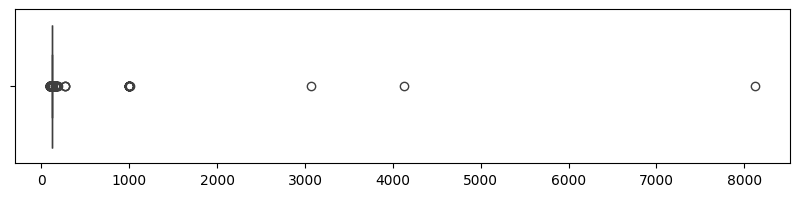

In [161]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df, x = gaps)

# Estimated time scale

### Extract special values

In [162]:
missing_times = df.Time_cumulative_sec[df.Is_Header == True]

In [163]:
len(missing_times)

15

In [164]:
delays = df[(df.Gap> 200) & (df.Gap!=1000)]['Time_cumulative_sec']

In [165]:
df[(df.Gap> 200) & (df.Gap!=1000)]

,Time_ms,AccelX,AccelY,AccelZ,Temp_C,Pressure_hPa,Is_Header,Batch,RawAltitude,AdjustedAltitude,Gap,Time_cumulative,Time_cumulative_sec,Time_cumulative_min
13440,1381091.0,-9.92,-1.45,-3.22,20.41,1025.85,False,11,-106.319271,10.163435,270.0,1644364.0,1644.364,27.406067
13443,1384404.0,-7.34,-1.33,-3.33,20.39,1025.84,False,11,-106.228073,10.254633,3066.0,1650473.0,1650.473,27.507883
13473,1388990.0,-8.75,-2.31,-3.69,20.39,1025.84,False,11,-106.228073,10.254633,1009.0,1653002.0,1653.002,27.550033
13500,1396325.0,-11.10,-1.88,-2.98,20.36,1025.85,False,11,-106.301162,10.181544,4129.0,1663457.0,1663.457,27.724283
13514,1406046.0,-11.73,0.31,-6.35,20.35,1025.97,False,11,-107.304803,9.177902,8118.0,1677167.0,1677.167,27.952783
13948,43185.0,-1.77,0.35,-10.24,20.13,1026.23,False,14,-109.404811,7.077894,265.0,1724268.0,1724.268,28.737800
13998,49318.0,2.98,-3.80,-10.08,20.16,1026.23,False,14,-109.416002,7.066703,264.0,1730400.0,1730.400,28.840000


In [166]:
df[(df.Gap> 200) & (df.Gap==1000)] # First record after NewHeader, inserted manually 

,Time_ms,AccelX,AccelY,AccelZ,Temp_C,Pressure_hPa,Is_Header,Batch,RawAltitude,AdjustedAltitude,Gap,Time_cumulative,Time_cumulative_sec,Time_cumulative_min
232,5.0,1.73,-2.47,-13.49,18.69,1026.88,False,2,-114.290026,2.192680,1000.0,28850.0,28.850,0.480833
426,5.0,0.39,0.31,-11.81,19.01,1027.02,False,3,-115.584160,0.898546,1000.0,52897.0,52.897,0.881617
433,5.0,-2.08,0.00,-10.12,19.03,1026.98,False,4,-115.258115,1.224590,1000.0,54551.0,54.551,0.909183
445,NaN,NaN,NaN,NaN,NaN,NaN,True,Header,NaN,NaN,1000.0,56805.0,56.805,0.946750
446,NaN,NaN,NaN,NaN,NaN,NaN,True,Header,NaN,NaN,1000.0,57805.0,57.805,0.963417
447,4.0,-2.20,-2.59,-10.67,19.07,1026.85,False,7,-114.188312,2.294393,1000.0,58805.0,58.805,0.980083
449,4.0,-1.61,-2.63,-10.47,19.03,1026.81,False,8,-113.838680,2.644026,1000.0,59905.0,59.905,0.998417
693,5.0,0.67,-5.37,-9.65,19.42,1026.83,False,9,-114.157856,2.324849,1000.0,90094.0,90.094,1.501567
2079,4.0,-1.14,0.04,-1.10,20.87,1011.71,False,10,13.088361,129.571066,1000.0,258021.0,258.021,4.300350
2115,4.0,-8.12,-15.38,-2.00,20.92,1016.12,False,11,-24.353165,92.129541,1000.0,263107.0,263.107,4.385117


In [167]:
len(delays)

7

In [185]:
columns_to_plot = ['AdjustedAltitude',
 'AccelX',
 'AccelY',
 'AccelZ',
 'Temp_C',
 'Pressure_hPa'
 ]

### All experimets, start to end recording

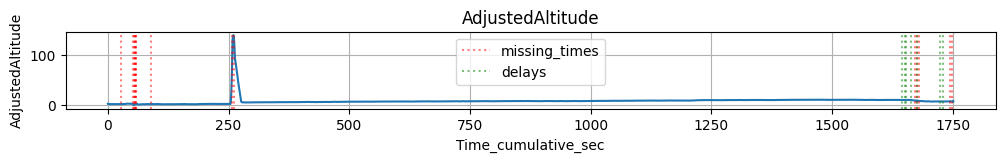

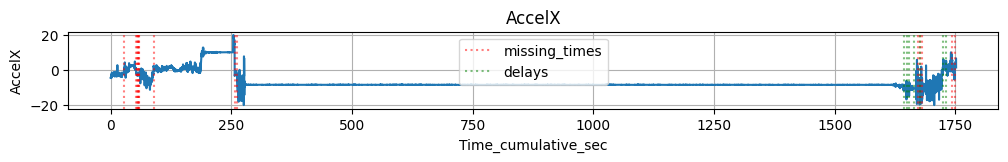

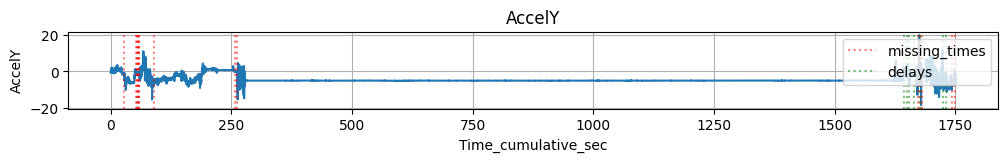

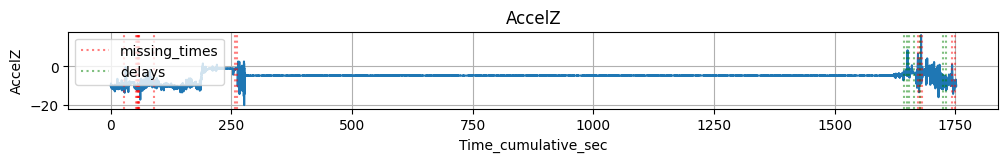

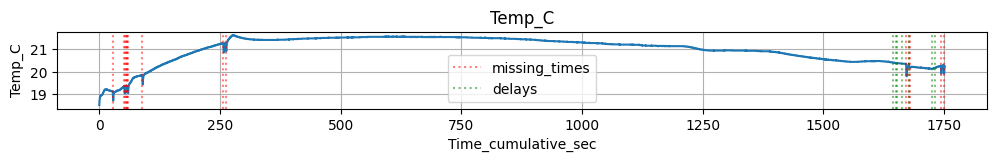

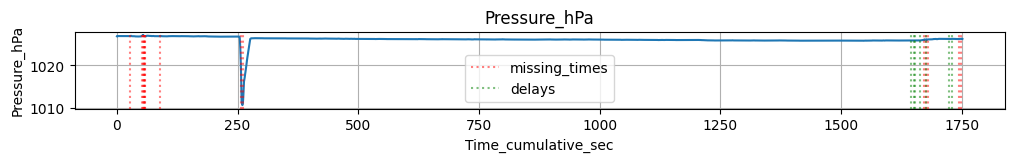

In [187]:
for c in columns_to_plot:

    plt.figure(figsize=(12,1))
    plt.title(c)
    sns.lineplot(data=df, x= df.Time_cumulative_sec , y = df[c])

    for i in missing_times:
        plt.axvline(x=i, color='red', linestyle='dotted', alpha = 0.5, label = 'missing_times')
    for n in delays:
        plt.axvline(x=n, color='green', linestyle='dotted', alpha = 0.5, label = 'delays')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    plt.legend(by_label.values(), by_label.keys())
    plt.grid()
    plt.show()

### The launch

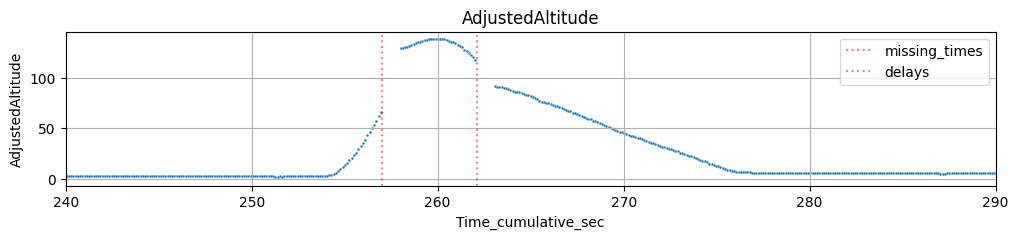

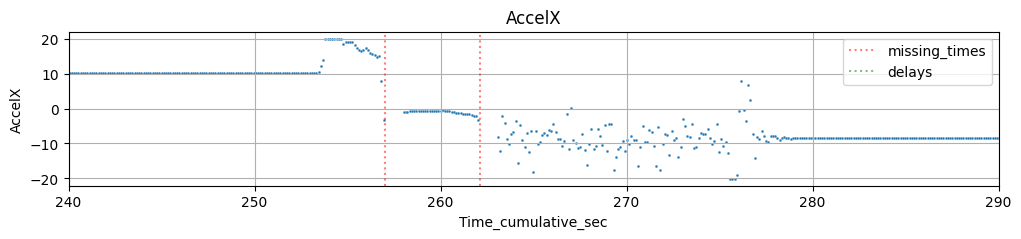

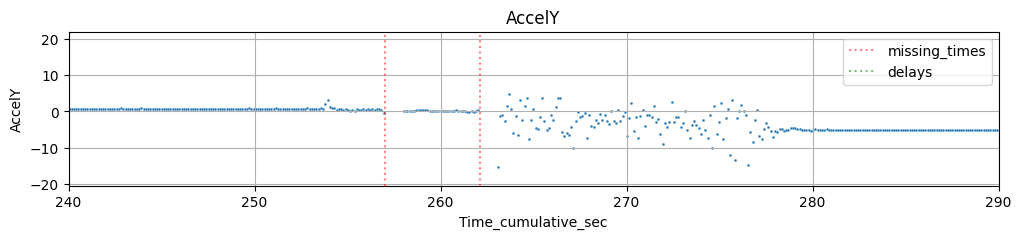

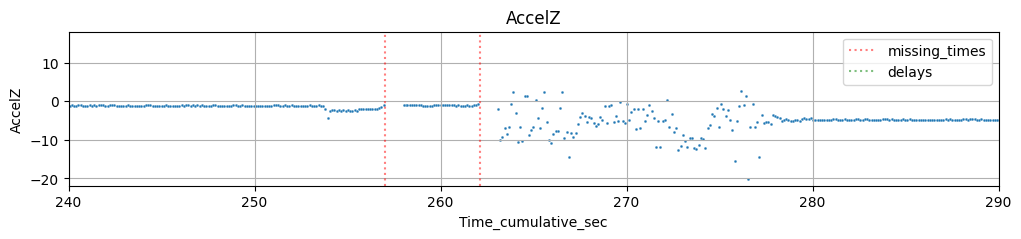

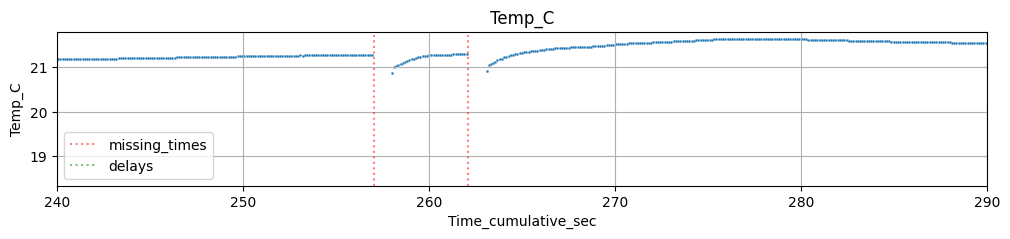

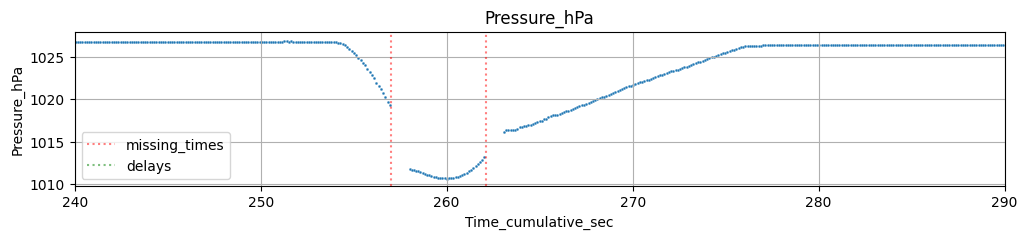

In [194]:
for c in columns_to_plot:

    plt.figure(figsize=(12,2))
    plt.title(c)
    sns.scatterplot(data=df, x= df.Time_cumulative_sec , y = df[c], s=4)

    for i in missing_times:
        plt.axvline(x=i, color='red', linestyle='dotted', alpha = 0.5, label = 'missing_times')
    for n in delays:
        plt.axvline(x=n, color='green', linestyle='dotted', alpha = 0.5, label = 'delays')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    plt.legend(by_label.values(), by_label.keys())

    plt.xlim([240,290])
    plt.grid()
    plt.show()

### Focus launch

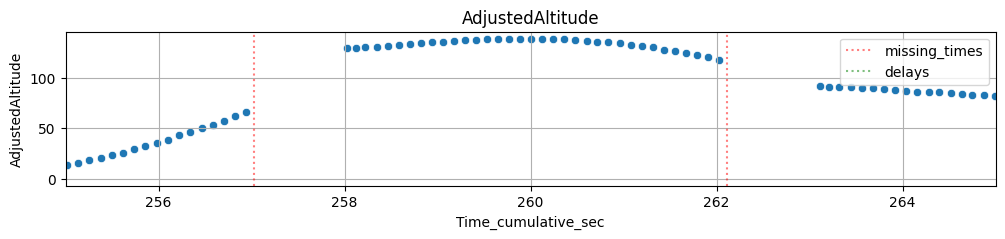

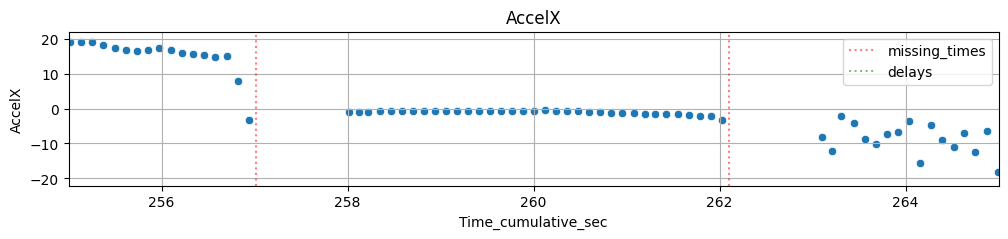

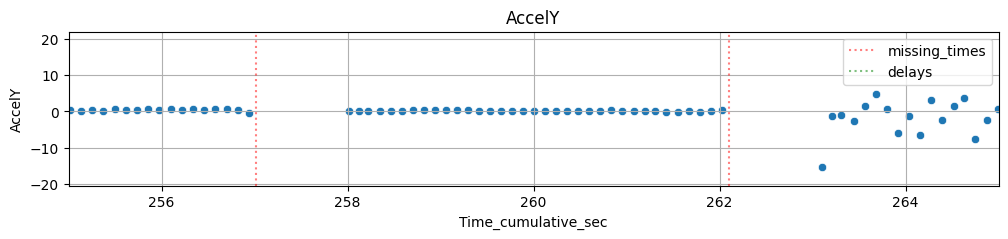

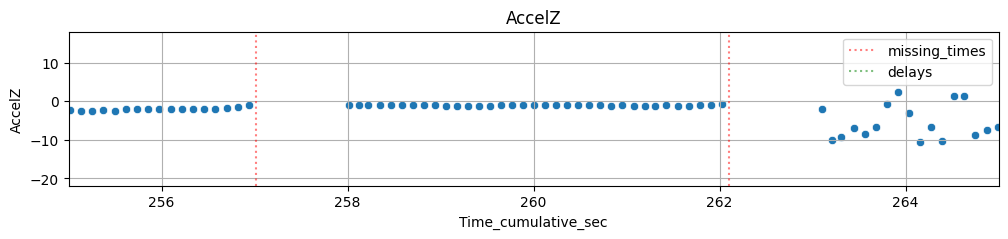

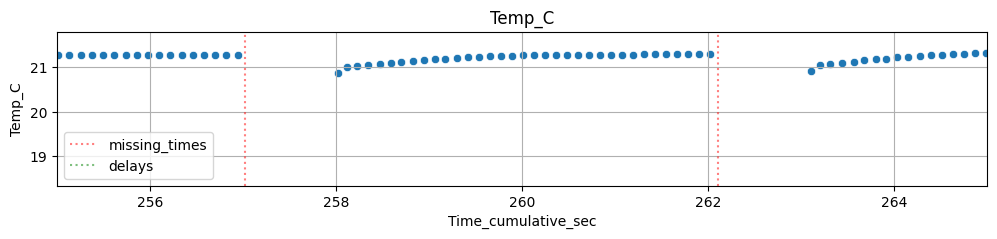

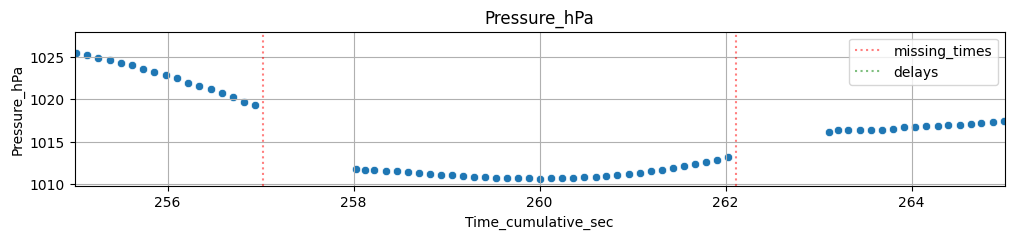

In [189]:
for c in columns_to_plot:

    plt.figure(figsize=(12,2))
    plt.title(c)
    sns.scatterplot(data=df, x= df.Time_cumulative_sec , y = df[c])

    for i in missing_times:
        plt.axvline(x=i, color='red', linestyle='dotted', alpha = 0.5, label = 'missing_times')
    for n in delays:
        plt.axvline(x=n, color='green', linestyle='dotted', alpha = 0.5, label = 'delays')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    plt.legend(by_label.values(), by_label.keys())

    plt.xlim([255,265])
    plt.grid()
    plt.show()

### Recovery

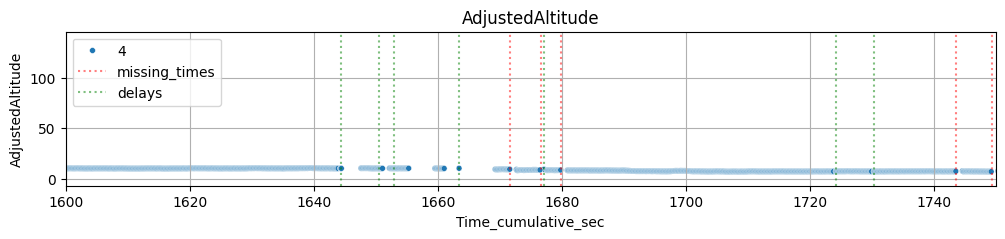

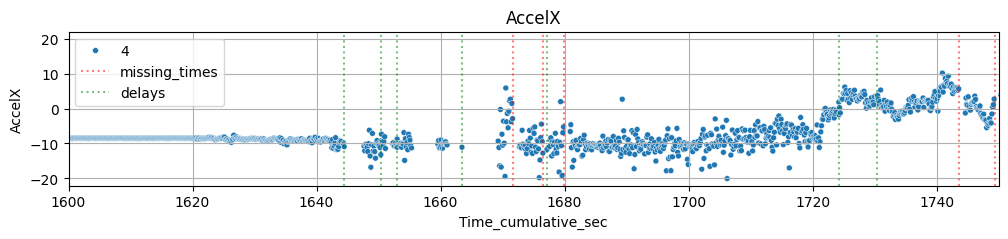

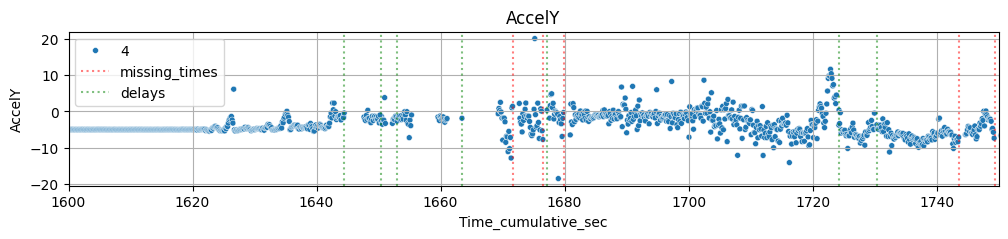

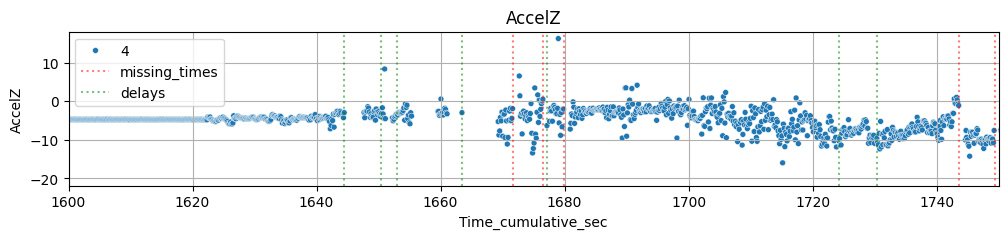

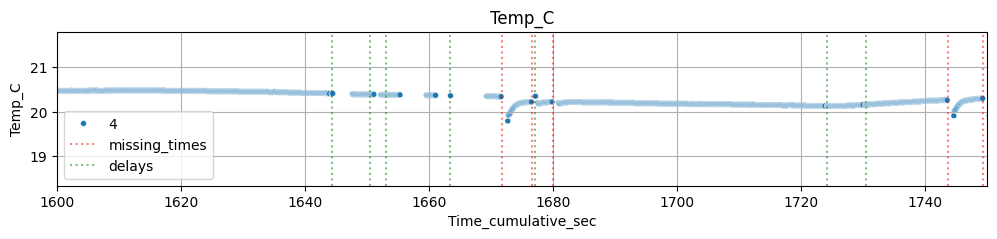

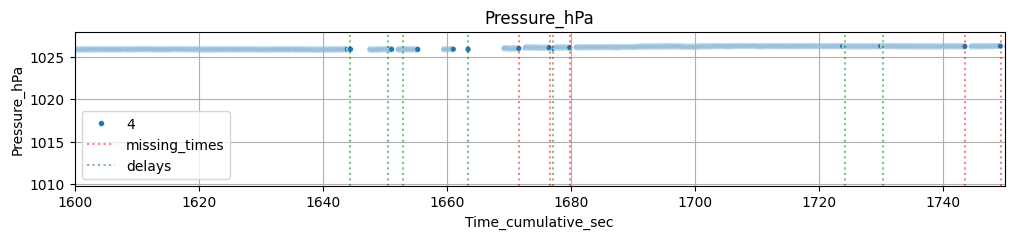

In [195]:
for c in columns_to_plot:

    plt.figure(figsize=(12,2))
    plt.title(c)
    sns.scatterplot(data=df, x= df.Time_cumulative_sec , y = df[c], size = 4)

    for i in missing_times:
        plt.axvline(x=i, color='red', linestyle='dotted', alpha = 0.5, label = 'missing_times')
    for n in delays:
        plt.axvline(x=n, color='green', linestyle='dotted', alpha = 0.5, label = 'delays')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    plt.legend(by_label.values(), by_label.keys())

    plt.xlim([1600,1750])
    plt.grid()
    plt.show()

### Forze

In [222]:
acc_df = df.melt(id_vars=['AdjustedAltitude','Time_cumulative_sec'],
           value_vars=['AccelX','AccelY','AccelZ'], var_name= 'Axis', value_name='Accelation')

In [223]:
acc_df

,AdjustedAltitude,Time_cumulative_sec,Axis,Accelation
0,2.687726,0.000,AccelX,-4.43
1,1.966031,0.200,AccelX,-4.28
2,1.962106,0.300,AccelX,-4.20
3,2.033725,0.434,AccelX,-3.96
4,2.018037,0.557,AccelX,-4.20
...,...,...,...,...
42487,7.059242,1751.170,AccelZ,-9.53
42488,7.135656,1751.288,AccelZ,-7.73
42489,7.131929,1751.402,AccelZ,-9.38
42490,7.128201,1751.524,AccelZ,-10.55


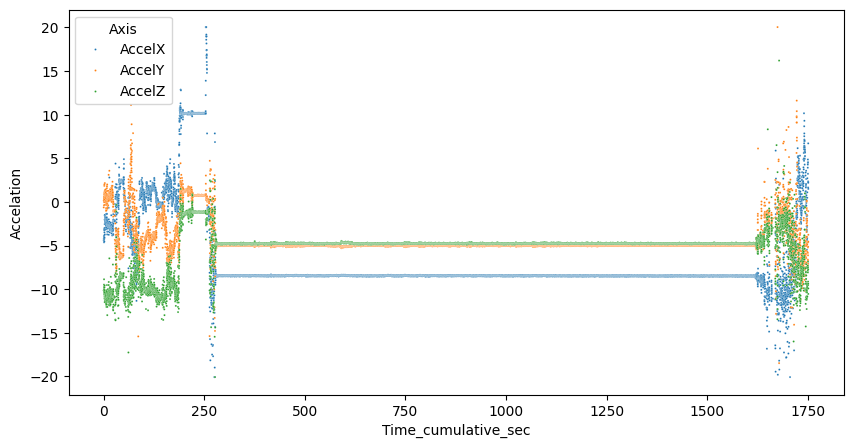

In [235]:
plt.figure(figsize=(10,5))
sns.scatterplot(data= acc_df, x = 'Time_cumulative_sec',
                y = 'Accelation', hue = 'Axis', s=2)
plt.show()